<figure>
  <IMG SRC="https://raw.githubusercontent.com/pastas/pastas/master/doc/_static/Art_logo.jpg" WIDTH=250 ALIGN="right">
</figure>

# Simulating groundwater levels with a surface water level
*Developed by Raoul Collenteur*

In this example it is shown how to create a time series model with not only evaporation and precipitation, but also including surface water levels. The following data is used:

- groundwater.csv: groundwaterlevels
- rain.csv: Precipitation
- evap.csv: Potential evaporation
- waterlevel.csv: Surface waterlevel

In [1]:
import pandas as pd
import pastas as ps
import matplotlib.pyplot as plt

%matplotlib notebook

### 1. import and plot the data

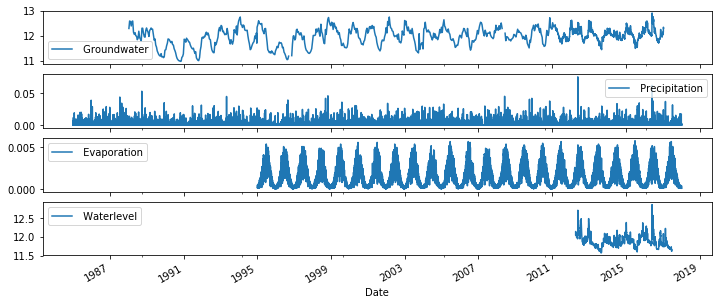

In [2]:
oseries = pd.read_csv("data_notebook_5/groundwater.csv", parse_dates=True, squeeze=True, index_col=0)
rain = pd.read_csv("data_notebook_5/rain.csv", parse_dates=True, squeeze=True, index_col=0)
evap = pd.read_csv("data_notebook_5/evap.csv", parse_dates=True, squeeze=True, index_col=0)
waterlevel = pd.read_csv("data_notebook_5/waterlevel.csv", parse_dates=True, squeeze=True, index_col=0)

fig, axes = plt.subplots(4,1, figsize=(12, 5), sharex=True)
oseries.plot(ax=axes[0], x_compat=True, legend=True)
rain.plot(ax=axes[1], x_compat=True, legend=True)
evap.plot(ax=axes[2], x_compat=True, legend=True)
waterlevel.plot(ax=axes[3], x_compat=True, legend=True)


### 2. Create a timeseries model


INFO: Cannot determine frequency of series  Groundwater
INFO: 5 nan-value(s) was/were found and filled with: drop
INFO: Inferred frequency from time series  Precipitation: freq=D 
INFO: Inferred frequency from time series  Evaporation: freq=D 

Model Results  Groundwater                Fit Statistics
============================    ============================
nfev     36                     EVP                    61.25
nobs     2412                   NS                      0.61
noise    NoiseModel             Pearson R2              0.85
tmin     2000-01-01 00:00:00    RMSE                    0.14
tmax     2017-01-16 00:00:00    AIC                    10.27
freq     D                      BIC                    45.00
warmup   3650                   __                          
solver   LeastSquares           ___                         

Parameters (6 were optimized)
                optimal               stderr      initial vary
recharge_A   408.571192   ± 3.72e+01 (9.11%)  1650.6111

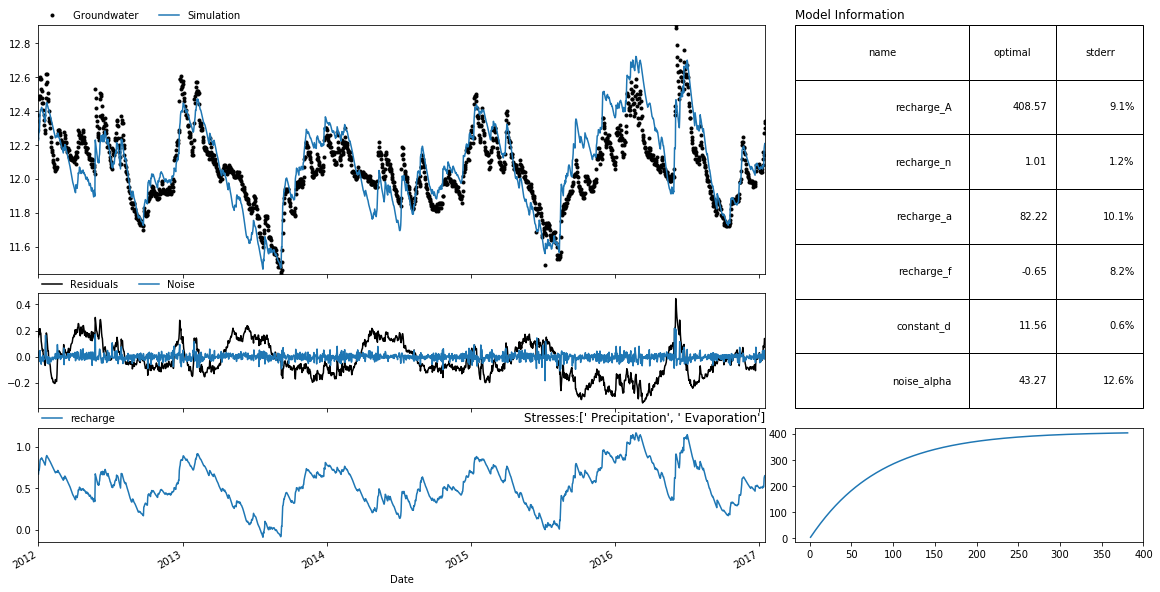

In [3]:
ml = ps.Model(oseries)

sm = ps.StressModel2([rain, evap], rfunc=ps.Gamma, name="recharge")
ml.add_stressmodel(sm)

ml.solve(tmin="2000")
ml.plots.results(tmin="2012", figsize=(16, 8))
print("The explained variance percentage over the period 2012-2017 is: %s" % ml.stats.evp(tmin="2012"))

### 3. Adding surface water level

In [4]:
w = ps.StressModel(waterlevel, rfunc=ps.Exponential,  name="waterlevel", settings="waterlevel")

# Normalize the stress by the mean such that only the variation in the waterlevel matters
w.update_stress(norm="mean")

ml.add_stressmodel(w)
ml.solve(tmin="2012")

INFO: Cannot determine frequency of series  Waterlevel
INFO: Time Series  Waterlevel were sampled down to freq D with method timestep_weighted_resample
INFO: Time Series  Waterlevel were sampled down to freq D with method timestep_weighted_resample

Model Results  Groundwater                Fit Statistics
============================    ============================
nfev     45                     EVP                    75.93
nobs     1843                   NS                      0.76
noise    NoiseModel             Pearson R2              0.88
tmin     2012-01-01 00:00:00    RMSE                    0.11
tmax     2017-01-16 00:00:00    AIC                    15.86
freq     D                      BIC                    60.01
warmup   3650                   __                          
solver   LeastSquares           ___                         

Parameters (8 were optimized)
                 optimal               stderr      initial vary
recharge_A    259.826181  ± 3.96e+01 (15.23%)  16

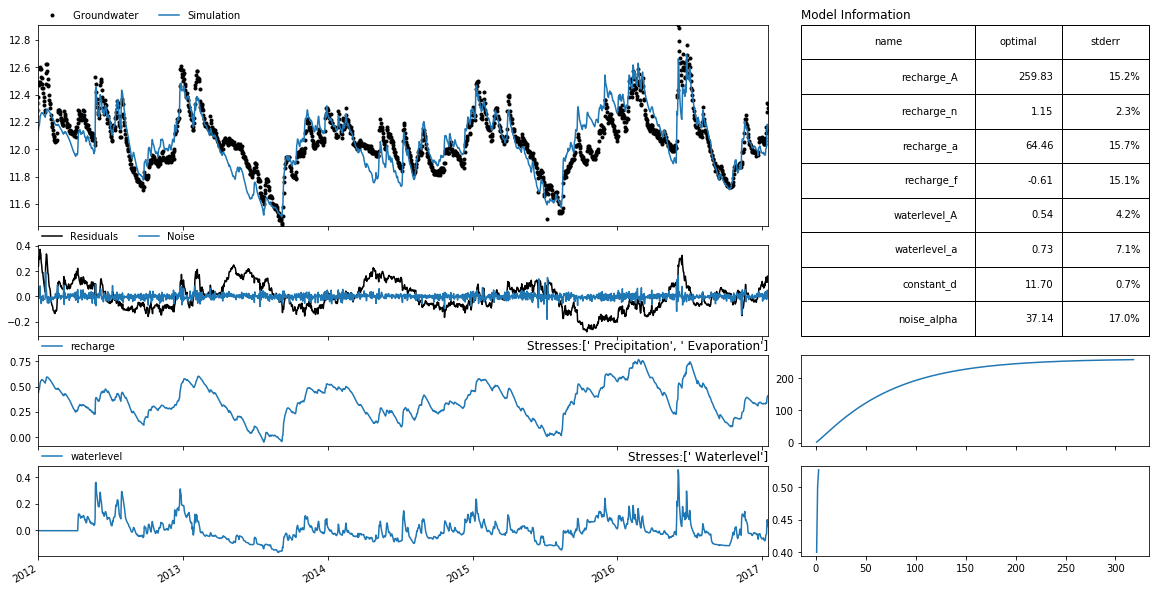

In [5]:
ml.plots.results(figsize=(16, 8))